In [77]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [71]:
import importlib
import tools
importlib.reload(tools)
from tools import bin_data  

energiest = np.empty(0)
naivet = np.empty(0)
detailedt = np.empty(0)
edept=np.empty(0)

file_ns = range(54)
for n in file_ns:
    datat = np.load(f'/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_run{n}.npz')

    energiest = np.append(energiest, datat['energies'])
    naivet = np.append(naivet, datat['naive'])
    detailedt = np.append(detailedt, datat['detailed'])
    edept = np.append(edept, datat['edeps'])


datag = np.load('/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_cleaned.npz')

energiesg = datag['energies']
naiveg = datag['naive']
detailedg = datag['detailed']
evsg = datag['evs'].astype(int)


energiest = energiest[evsg]
naivet = naivet[evsg]
detailedt = detailedt[evsg]
edept = edept[evsg]

# outlier = 18272

# energiest = np.delete(energiest, outlier)
# naivet = np.delete(naivet, outlier)
# detailedt = np.delete(detailedt, outlier)
# edept = np.delete(edept, outlier)
# energiesg = np.delete(energiesg, outlier)
# naiveg = np.delete(naiveg, outlier)
# detailedg = np.delete(detailedg, outlier)
# evsg = np.delete(evsg, outlier)


mask = (energiesg > 150) & (energiesg < 850)
naiveg = naiveg[mask]
detailedg = detailedg[mask]
energiesg = energiesg[mask]



mask = (energiest > 150) & (energiest < 850)
naivet = naivet[mask]
detailedt = detailedt[mask]
energiest = energiest[mask]
edept = edept[mask]



splinest = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns54k_truth.npz')
naivet_spl = BSpline(splinest['naive_t'], splinest['naive_c'], splinest['naive_k'])
detailedt_spl = BSpline(splinest['detailed_t'], splinest['detailed_c'], splinest['detailed_k'])
edept_spl = BSpline(splinest['edep_t'], splinest['edep_c'], splinest['edep_k'])


splinesg = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns_54k_gampix.npz')
naiveg_spl = BSpline(splinesg['naive_t'], splinesg['naive_c'], splinesg['naive_k'])
detailedg_spl = BSpline(splinesg['detailed_t'], splinesg['detailed_c'], splinesg['detailed_k'])

In [72]:
naivet_res = naivet_spl(naivet) - energiest
naivet_rres = naivet_res / energiest

detailedt_res = detailedt_spl(detailedt) - energiest
detailedt_rres = detailedt_res / energiest

edept_res = edept_spl(edept) - energiest
edept_rres = edept_res / energiest


naiveg_res = naiveg_spl(naiveg) - energiesg
naiveg_rres = naiveg_res / energiesg

detailedg_res = detailedg_spl(detailedg) - energiesg
detailedg_rres = detailedg_res / energiesg



total_evs = '~40k'

edepsim avg: 0.001875143008428672
gampix avg: 0.001404142204445196

edepsim stdev: 0.02530089788817358
gampix stdev: 0.02576001953996204


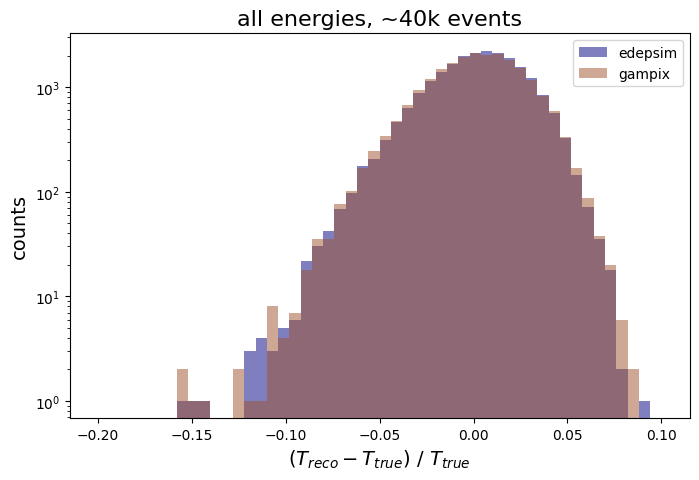

In [75]:
bins=np.linspace(-0.2, 0.1, 51)

plt.figure(figsize=(8, 5))
plt.yscale('log')
plt.hist(naivet_rres, bins=bins, alpha=0.5, label='edepsim', color='navy')
plt.hist(naiveg_rres, bins=bins, alpha=0.5, label='gampix', color='sienna')
plt.xlabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('all energies, ~40k events', fontsize=16)
plt.legend()
plt.savefig('plots/accuracy/naive_accuracy_comparison.png')

print(f'edepsim avg: {naivet_rres.mean()}')
print(f'gampix avg: {naiveg_rres.mean()}')
print()
print(f'edepsim stdev: {naivet_rres.std()}')
print(f'gampix stdev: {naiveg_rres.std()}')

edepsim avg: 0.0018934464483102728
gampix avg: 0.0012656076872781484

edepsim stdev: 0.024771251378717298
gampix stdev: 0.025352417938580576


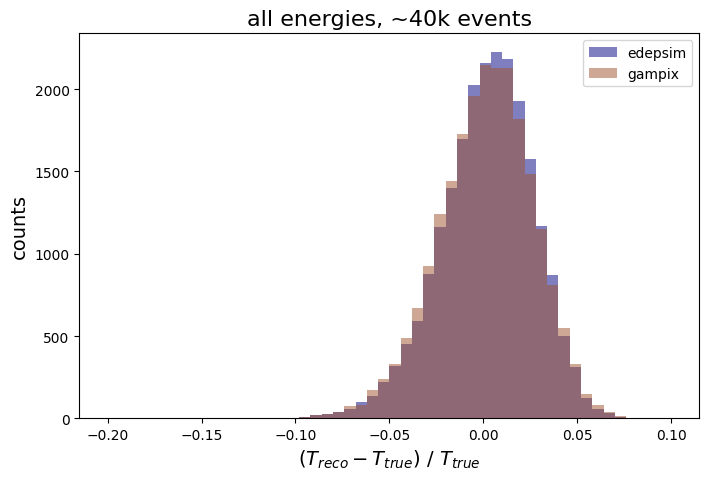

In [74]:
plt.figure(figsize=(8, 5))
# plt.yscale('log')
plt.hist(detailedt_rres, bins=bins, alpha=0.5, label='edepsim', color='navy')
plt.hist(detailedg_rres, bins=bins, alpha=0.5, label='gampix', color='sienna')
plt.xlabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('all energies, ~40k events', fontsize=16)
plt.legend()
plt.savefig('plots/accuracy/detailed_accuracy_comparison.png')


print(f'edepsim avg: {detailedt_rres.mean()}')
print(f'gampix avg: {detailedg_rres.mean()}')
print()
print(f'edepsim stdev: {detailedt_rres.std()}')
print(f'gampix stdev: {detailedg_rres.std()}')

In [38]:
pd_mask = (energiesg >= 200) & (energiesg < 300)
pd_detailedt_rres = detailedt_rres[pd_mask]
pd_detailedg_rres = detailedg_rres[pd_mask]
print(len(pd_detailedt_rres))

plt.figure(figsize=(8, 5))
plt.hist(pd_detailedt_rres, bins=30, alpha=0.5, label='edepsim', color='navy')
plt.hist(pd_detailedg_rres, bins=30, alpha=0.5, label='gampix', color='sienna')
plt.xlabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('200-300 MeV, ~5k events', fontsize=16)
plt.legend()
plt.savefig('plots/accuracy/detailed_accuracy_comparison_ROI.png')


print(f'edepsim avg: {pd_detailedt_rres.mean()}')
print(f'gampix avg: {pd_detailedg_rres.mean()}')
print()
print(f'edepsim stdev: {pd_detailedt_rres.std()}')
print(f'gampix stdev: {pd_detailedg_rres.std()}')

IndexError: boolean index did not match indexed array along axis 0; size of axis is 23774 but size of corresponding boolean axis is 23775

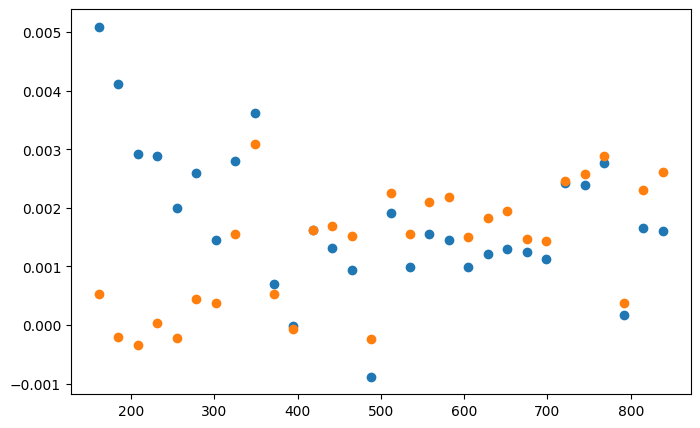

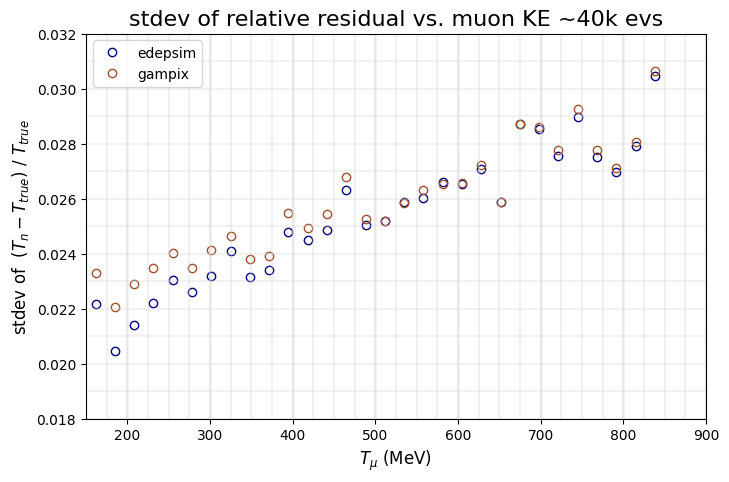

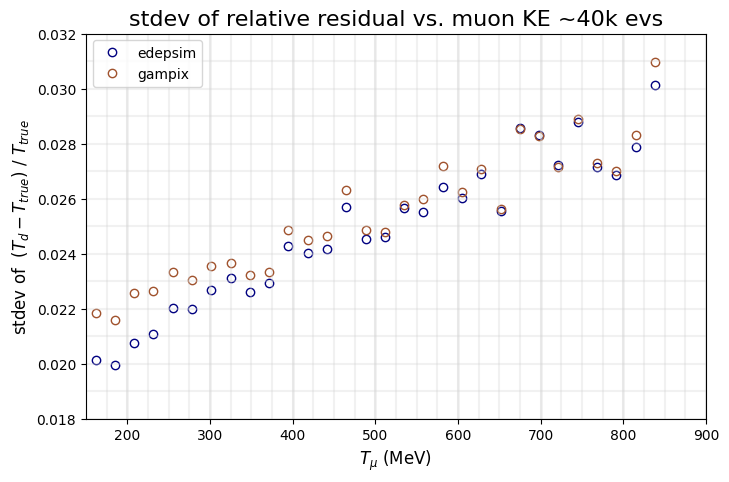

In [76]:
naivet_rres_x, naivet_rres_y, naivet_rres_error, _ = bin_data(energiest, naivet_rres, 30)
naiveg_rres_x, naiveg_rres_y, naiveg_rres_error, _ = bin_data(energiesg, naiveg_rres, 30)


detailedt_rres_x, detailedt_rres_y, detailedt_rres_error, _ = bin_data(energiest, detailedt_rres, 30)
detailedg_rres_x, detailedg_rres_y, detailedg_rres_error, _ = bin_data(energiesg, detailedg_rres, 30)

plt.figure(figsize=(8, 5))
plt.plot(detailedt_rres_x, detailedt_rres_y, 'o')
plt.plot(detailedg_rres_x, detailedg_rres_y, 'o')

vlines_main = np.linspace(0, 1000, 11)
vlines_fine = np.linspace(0, 1000, 41)
hlines = np.linspace(0.018, 0.032, 15)

plt.figure(figsize=(8, 5))
plt.ylim(0.018, 0.032)
plt.xlim(150, 900)
# plt.yscale('log')
plt.plot(naivet_rres_x, naivet_rres_error, 'o', label="edepsim", markerfacecolor='none', color='navy')
plt.plot(naiveg_rres_x, naiveg_rres_error, 'o', label="gampix", markerfacecolor='none', color='sienna')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines, xmin=150, xmax=900, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{n} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/stdev_comp_naive{total_evs}evs.png')

plt.figure(figsize=(8, 5))
plt.ylim(0.018, 0.032)
plt.xlim(150, 900)
plt.plot(detailedt_rres_x, detailedt_rres_error, 'o', label="edepsim", markerfacecolor='none', color='navy')
plt.plot(detailedg_rres_x, detailedg_rres_error, 'o', label="gampix", markerfacecolor='none', color='sienna')
# plt.plot(detailedt_rres_x, detailedt_rres_error, 'o', label='detailed length', markerfacecolor='none')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines, xmin=150, xmax=900, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{d} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/stdev_comp_detailed_{total_evs}evs.png')

##### 